<a href="https://colab.research.google.com/github/aaolcay/Some-Signal-Processing-Stuff/blob/main/animation_cross_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cross-Correlation of Sinusoidal Signals**##
In this notebook, you will explore the fundamental concept of cross-correlation by analyzing six different signals (i.e., three different cross-correlation computation). For example, we view the correlation between two sine waves, one of them will have a changing phase, which will help us understand the effect of phase shifting on the cross-correlation.

For the code implementation, kindly refer to Abdullah A. Olcay.

### **Table of Contents**
**1.   Introduction**

**2.   Importing Libraries**

**3.   Defining Parameters**

**4.   Building the Animation and Calculating Cross-Correlation**

**5.   Results and Analysis**

**6.   Conclusion**

###**1. Introduction**
Cross-correlation is a mathematical operation that measures the similarity between two signals as a function of the time lag between them. Autocorrelation is a special case of cross-correlation when the two signals are the same.

In this tutorial, we will visualize the time domain signals, cross-correlation, and primarily observe the effect of phase shifting on the cross-correlation of two sine signals.

###**2. Importing Libraries**
Let's start by importing the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from scipy import signal

*   **`NumPy`:** `NumPy` is a widely-used library for numerical computing in Python.
*   **`Matplotlib.pyplot`:** `Matplotlib` is a plotting library that provides a wide range of visualization tools.

*   **`FuncAnimation`:** `FuncAnimation` is a class from Matplotlib that allows for creating animated plots.
*   **`Image`:** The Image class from `IPython.display` module is used to display the generated GIF in the notebook.

###**3. Defining Parameters**
Next, we will define some parameters for our demonstration. These parameters include the frequency of the sine waves, the sampling frequency, the number of samples, time values, and lag values.

In [2]:
pi = np.pi
f = 50 # Hz
fs = 44100 # Hz
N = 0.2*fs # samples
t = np.arange(0, N/fs, 1/fs)
lag = np.arange(-N/fs, N/fs-1/fs, 1/fs)  # Lag values in seconds

*   `pi`: The constant pi from the `NumPy` library.
*   `f`: The frequency of the sine waves in Hz.
*   `fs`: The sampling frequency in Hz.
*   `N`: The number of samples, calculated as 0.2 times the sampling frequency.
*   `t`: An array of time values from 0 to `N/f`s with a step size of `1/fs`.
*   `lag`: An array of lag values from `-N/fs` to `N/fs-1/fs` with a step size of `1/fs`.

###**4. Building the Animation and Calculating Cross-Correlation**
Now, we will build the animation and calculate the cross-correlation between the two different signals.

In [3]:
# Two Sine Waves, One is Shifted
def sine_waves(f, t, i):
    phase = 0.25*i*pi
    x1 = np.sin(2*pi*f*t)
    x2 = np.sin(2*pi*f*t - phase)
    return x1, x2, phase

In [4]:
# Sinc Function vs A Square
def sinc_square(f, t, i):
    phase = 0.25*i*pi
    x1 = np.hstack((np.zeros(2*int(len(t)/5)), np.ones((int(len(t)/5))), np.zeros(2*int(len(t)/5))))
    x2 = np.abs(np.sinc(2 * pi* f * t - phase))
    x2 = np.sinc(2 * pi* f * t - phase)
    #x1[x1<0.5] = 0
    x2[x1 == 0] = 0
    return x1, x2, phase

In [5]:
# A Triangle vs A Square
def sawtooth_square(f, t, i):
    phase = 0.25*i*pi
    x1 = np.hstack((np.zeros(2*int(len(t)/5)), np.ones((int(len(t)/5))), np.zeros(2*int(len(t)/5))))
    x2 = signal.sawtooth(2*pi*(f/4)*t - phase)
    x2[x2<0] = 0
    ind = np.where(x1 != 0)
    x2[0:np.min(ind)-100] = 0
    x2[np.max(ind)+100:] = 0
    return x1, x2, phase

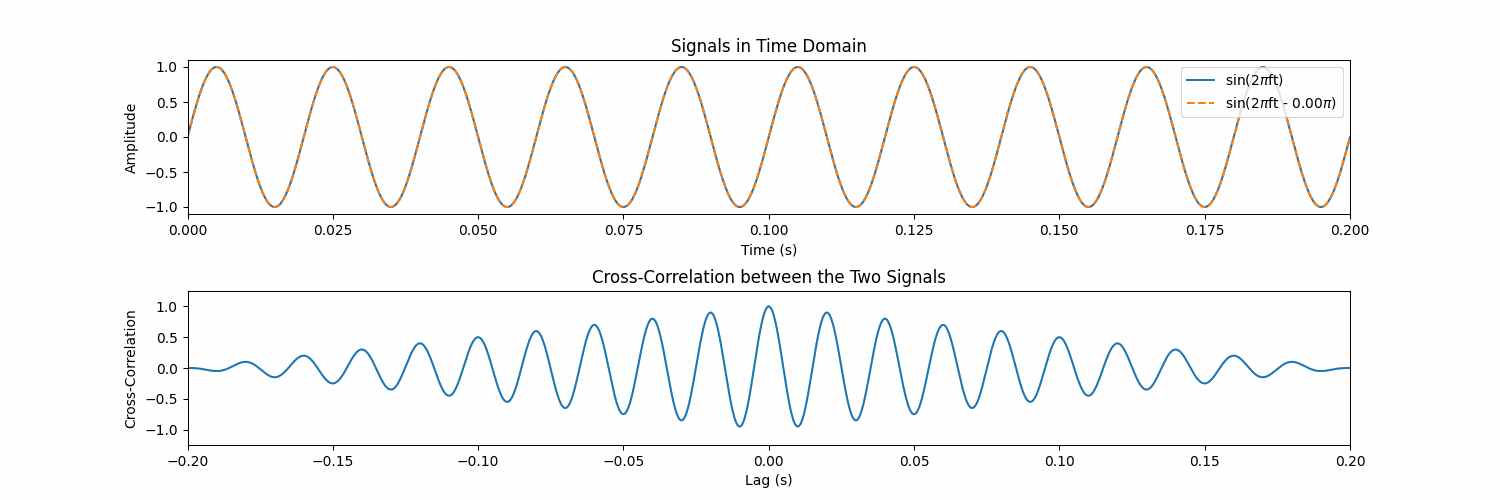

In [6]:
# Create a figure and subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
line1, = ax1.plot([], [], label='sin(2$\pi$ft)')  # create an empty plot line for sine
line2, = ax1.plot([], [],'--', label='sin(2$\pi$ft - phase)')  # create an empty plot line for cosine
ax1.set_xlabel('Time (s)')  # set label for x-axis
ax1.set_ylabel('Amplitude')  # set label for y-axis
ax1.set_ylim(-1.1, 1.1)  # set the y-axis limits
ax1.set_xlim(0, N / fs)  # set the x-axis limits
ax1.set_title('Signals in Time Domain')  # set the title for the plot
ax1.legend()  # display legend
line3, = ax2.plot([], [])
ax2.set_ylim(-1.25, 1.25)  # set the y-axis limits
ax2.set_xlim(-N/fs, N/fs)  # set the x-axis limits
ax2.set_title('Cross-Correlation between the Two Signals')  # set the title for the plot
ax2.set_xlabel('Lag (s)')
ax2.set_ylabel('Cross-Correlation')

# Adjust the vertical spacing between subplots
fig.subplots_adjust(hspace=0.5)

def animate_c_correlation(i, t):
    # Generate the signal for the current period and update the plot
    x1, x2, phase = sine_waves(f, t, i)
    line1.set_data(t, x1)
    line2.set_data(t, x2)
    line2.set_label(f'sin(2$\pi$ft - {(phase/pi):.2f}$\pi$)')
    ax1.legend(loc='upper right')
    cross_corr = np.correlate(x1, x2, mode='full')
    correction = 0.001
    cross_corr = cross_corr/(np.max(np.abs(cross_corr))+correction)
    line3.set_data(lag, cross_corr)
    return line1, line2, line3 # return the updated plot line for the animation

# Create the animation for time domain and save it as a GIF
anim1 = FuncAnimation(fig, animate_c_correlation, fargs=(t,), frames=64, interval=200)
anim1.save('animation.gif', writer='pillow')

# Close the figure to remove it from display
plt.close(fig)

# Display the animation as a GIF in Google Colab
image_path = 'animation.gif'
display(Image(filename=image_path))

*   `fig, (ax1, ax2)`: Create a figure and two subplots (`ax1` and `ax2`) for displaying the signals and cross-correlation.
*   `line1`, `line2`: Create empty plot lines for the sine waves.
*   `ax1`: Customize the first subplot (time domain signals) by setting labels, limits, and title.
*   `line3`: Create an empty plot line for displaying the cross-correlation.
*   `ax2`: Customize the second subplot (cross-correlation) by setting labels and limits.
*   `animate_c_correlation(i, t)`: The animation function that updates the plot for each frame. It generates the sine waves with a changing phase, updates the plot lines, calculates the cross-correlation using `np.correlate()`, and updates the cross-correlation plot line.
*   `FuncAnimation`: Create the animation using the animation function (`animate_c_correlation`), time values (`t`), number of frames, and interval between frames.
*   `anim1.save`: Save the animation as a GIF.
*   `plt.close(fig)`: Close the figure to remove it from the display.
*   `display(Image(filename=image_path))`: Display the generated GIF animation in the notebook.

###**5. Results and Analysis**
The code generates an animation demonstrating the time domain signals and cross-correlation between two sine signals with one's changing phase. The animation helps visualize how the phase shift affects the cross-correlation.

To interpret the animation, focus on the second subplot showing the cross-correlation. The cross-correlation represents the similarity between the two sine signals at different time lags (represented on the x-axis). The highest cross-correlation value indicates the time shift that maximizes the similarity between the two signals.

*For example, let's consider a phase shift of pi/2. We can convert this phase shift to degrees by multiplying it by 180/pi: (pi/2) * (180/pi) = 90 degrees. The corresponding time shift can be calculated as t = 90 / (360 * frequency). Since the frequency is set to 50 Hz, the time shift caused by the pi/2 phase shift is 90 / (360 * 50) = 0.005 seconds.*

Observing the cross-correlation plot, you can notice that the highest cross-correlation value occurs at approximately -0.005 seconds (negative lag) for the sine signal shifted by pi/2 phase. This demonstrates that the cross-correlation accurately captures the time shift between the signals.

###**6. Conclusion**
In this tutorial, you explored the concepts of cross-correlation using two sine signals with one's changing phase. We visualized the time domain signals and cross-correlation to observe the effect of phase shifting on the cross-correlation.

By following this tutorial, you have learned how to:
*   Import necessary libraries for signal processing and visualization
*   Define parameters such as frequency, sampling frequency, number of samples, and time values
*   Build an animation to visualize time domain signals and cross-correlation
*   Calculate cross-correlation using `np.correlate()`
*   Interpret the results and understand the impact of phase shifting on cross-correlation

Understanding cross-correlation and autocorrelation is essential in various fields, including signal processing, audio analysis, and image recognition. You can further explore these concepts by applying them to different signals and analyzing the results.

Remember to experiment with different parameters and signals to deepen your understanding of cross-correlation and its applications.

Thanks for reading!